___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***.

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method.

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)

In [55]:
df0 = pd.read_csv("capstone_step3_ML.csv")

In [56]:
df = df0.copy()

In [57]:
df.head()

,make_model,make,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,non_smoker_vehicle,upholstery,previous_owner,energy_efficiency_class,age,power_kw,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 160,Mercedes-Benz,16950.0,Compact,Used,Yes,120200.0,Manual,Diesel,Dealer,1595.0,5.0,98.0,Front,Alloy wheels,1270.0,No,No,Cloth,2.0,efficient,6.0,75.0,3.800,Standard,Standard,Safety Premium Package
1,Mercedes-Benz EQE 350,Mercedes-Benz,80900.0,Compact,Pre-registered,Yes,5000.0,Automatic,Electric,Dealer,1598.0,1.0,0.0,4WD,"Alloy wheels (21""), Shift paddles, Sport packa...",2355.0,No,No,Part/Full Leather,1.0,efficient,0.0,215.0,2.247,Premium,Plus,Safety Premium Package
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,69900.0,Compact,Used,Yes,18900.0,Automatic,Benzine,Dealer,1991.0,8.0,162.0,4WD,Alloy wheels,1555.0,No,No,Part/Full Leather,2.0,unefficient,2.0,310.0,8.400,Standard,Standard,Safety Premium Plus Package
3,Mercedes-Benz A 35 AMG,Mercedes-Benz,46990.0,Compact,Used,Yes,18995.0,Automatic,Benzine,Dealer,1991.0,7.0,169.0,4WD,Sport seats,1455.0,No,No,Part/Full Leather,2.0,unefficient,2.0,225.0,7.300,Standard,Standard,Safety Premium Package
4,Mercedes-Benz A 45 AMG,Mercedes-Benz,16800.0,Compact,Used,Yes,197000.0,Automatic,Diesel,Dealer,2143.0,7.0,162.0,4WD,Alloy wheels,1545.0,No,No,Part/Full Leather,2.0,unefficient,7.0,100.0,4.900,Standard,Standard,Safety Premium Plus Package


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23137 entries, 0 to 23136
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     23137 non-null  object 
 1   make                           23137 non-null  object 
 2   price                          23137 non-null  float64
 3   body_type                      23137 non-null  object 
 4   type                           23137 non-null  object 
 5   warranty                       23137 non-null  object 
 6   mileage                        23137 non-null  float64
 7   gearbox                        23137 non-null  object 
 8   fuel_type                      23137 non-null  object 
 9   seller                         23137 non-null  object 
 10  engine_size                    23137 non-null  float64
 11  gears                          23137 non-null  float64
 12  co_emissions                   23137 non-null 

In [59]:
df.describe()

,price,mileage,engine_size,gears,co_emissions,empty_weight,previous_owner,age,power_kw,cons_avg
count,23137.000000,23137.000000,23137.000000,23137.000000,23137.000000,23137.000000,23137.000000,23137.000000,23137.000000,23137.000000
mean,23879.791676,67521.069085,1737.954532,5.797208,130.278483,1419.495051,1.457881,5.155854,119.021329,5.582609
std,21718.934021,62558.821244,768.439111,1.423178,55.383527,304.174352,0.838157,4.695518,67.288570,2.245082
min,490.000000,0.000000,332.000000,1.000000,0.000000,347.000000,1.000000,0.000000,33.000000,0.000000
25%,12390.000000,18300.000000,1248.000000,5.000000,106.500000,1217.000000,1.000000,2.000000,80.000000,4.400000
50%,18900.000000,51813.000000,1596.000000,6.000000,124.000000,1375.000000,1.000000,4.000000,100.000000,5.200000
75%,28500.000000,99112.000000,1975.000000,6.000000,153.000000,1587.000000,2.000000,7.000000,135.000000,6.500000
max,549000.000000,667128.000000,6300.000000,8.000000,399.000000,3150.000000,9.000000,20.000000,450.000000,18.300000


In [60]:
df.duplicated().sum()

0

In [61]:
df.make_model.value_counts()

make_model
Renault Megane              810
SEAT Leon                   733
Opel Astra                  627
Hyundai i30                 557
Ford Mustang                544
Peugeot 308                 504
Dacia Sandero               480
Ford Focus                  478
SEAT Ibiza                  425
Nissan Qashqai              424
Ford Fiesta                 392
Fiat 500                    391
Renault Clio                364
Opel Corsa                  348
Skoda Octavia               336
Nissan Micra                327
Fiat 500X                   322
Fiat Tipo                   320
Dacia Duster                314
Opel Insignia               290
Volvo C70                   276
Toyota Yaris                271
Volvo V40                   265
Peugeot 208                 257
Skoda Fabia                 231
Hyundai TUCSON              212
Ford Kuga                   208
Peugeot 3008                207
Peugeot RCZ                 198
Volvo XC60                  192
Peugeot 508                 1

**For machine learning models to learn a data well, the data should contain as much detail as possible. Here is the number of models of some brands is very low. There should be a sufficient number of observations from each make and model, so that the machine learning model can accurately predict the car prices. For this I have decided to exclude brand models below 100 from the data**

In [62]:
drop_model = df.make_model.value_counts()[df.make_model.value_counts() <= 100].index
drop_model

Index(['Nissan Juke', 'Toyota RAV 4', 'Hyundai IONIQ', 'Peugeot 307',
       'Hyundai i10', 'Renault Twingo', 'Renault ZOE', 'Renault Laguna',
       'Opel Crossland X', 'Skoda Kamiq',
       ...
       'Nissan Ariya', 'Mercedes-Benz CL 63 AMG', 'Renault Grand Modus',
       'Renault R 11', 'Mercedes-Benz CLK 63 AMG', 'Mercedes-Benz 170',
       'Mercedes-Benz GLS 63 AMG', 'Mercedes-Benz CLS 320',
       'Mercedes-Benz GL 320', 'Mercedes-Benz EQE 500'],
      dtype='object', name='make_model', length=437)

In [63]:
for i in drop_model:
    drop_index = df[df['make_model'] == i].index
    df.drop(index = drop_index, inplace=True)

df.reset_index(drop=True, inplace=True)

In [64]:
df.make_model.value_counts()

make_model
Renault Megane         810
SEAT Leon              733
Opel Astra             627
Hyundai i30            557
Ford Mustang           544
Peugeot 308            504
Dacia Sandero          480
Ford Focus             478
SEAT Ibiza             425
Nissan Qashqai         424
Ford Fiesta            392
Fiat 500               391
Renault Clio           364
Opel Corsa             348
Skoda Octavia          336
Nissan Micra           327
Fiat 500X              322
Fiat Tipo              320
Dacia Duster           314
Opel Insignia          290
Volvo C70              276
Toyota Yaris           271
Volvo V40              265
Peugeot 208            257
Skoda Fabia            231
Hyundai TUCSON         212
Ford Kuga              208
Peugeot 3008           207
Peugeot RCZ            198
Volvo XC60             192
Peugeot 508            190
Skoda Superb           187
Fiat 500C              184
Skoda Scala            179
SEAT Ateca             178
Toyota Corolla         177
SEAT Arona       

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16268 entries, 0 to 16267
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   make_model                     16268 non-null  object 
 1   make                           16268 non-null  object 
 2   price                          16268 non-null  float64
 3   body_type                      16268 non-null  object 
 4   type                           16268 non-null  object 
 5   warranty                       16268 non-null  object 
 6   mileage                        16268 non-null  float64
 7   gearbox                        16268 non-null  object 
 8   fuel_type                      16268 non-null  object 
 9   seller                         16268 non-null  object 
 10  engine_size                    16268 non-null  float64
 11  gears                          16268 non-null  float64
 12  co_emissions                   16268 non-null 

## Feature Engineering


In [66]:
df.drop(columns=["make"], inplace=True)

**I can get the insight I need from the make_model feature, I don't think I need the make feature anymore**

In [67]:
df_object = df.select_dtypes(include ="object").head()
df_object

,make_model,body_type,type,warranty,gearbox,fuel_type,seller,drivetrain,extras,full_service_history,non_smoker_vehicle,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,Compact,Used,Yes,Manual,Diesel,Dealer,Front,"Alloy wheels, Automatically dimming interior m...",No,No,Part/Full Leather,unefficient,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,Compact,Used,No,Manual,Diesel,Dealer,Front,"Alloy wheels, Automatically dimming interior m...",Yes,Yes,Cloth,unefficient,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,Sport seats,No,No,Cloth,unefficient,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,Sport seats,No,No,Cloth,unefficient,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,Sport seats,No,No,Cloth,unefficient,Standard,Standard,Safety Premium Package


In [68]:
for col in df_object:
    print(f"{col:<30}:", df[col].nunique())

make_model                    : 66
body_type                     : 6
type                          : 4
warranty                      : 2
gearbox                       : 3
fuel_type                     : 4
seller                        : 2
drivetrain                    : 3
extras                        : 6398
full_service_history          : 2
non_smoker_vehicle            : 2
upholstery                    : 2
energy_efficiency_class       : 2
comfort_&_convenience_Package : 3
entertainment_&_media_Package : 2
safety_&_security_Package     : 3


### Converting the Extras feature from object to numeric
**Too many unique values in the extras feature**

In [69]:
df.extras.sample(10)

13071    Alloy wheels, Catalytic Converter, Roof rack, ...
13639    Alloy wheels, Sport seats, Touch screen, Voice...
3                                              Sport seats
8672     Alloy wheels, Catalytic Converter, Roof rack, ...
2611                     Catalytic Converter, Touch screen
10103    Alloy wheels (17"), Automatically dimming inte...
3426                                    Alloy wheels (17")
672      All season tyres, Alloy wheels, Automatically ...
12835                                         Alloy wheels
7057     Alloy wheels, Catalytic Converter, Roof rack, ...
Name: extras, dtype: object

**In this feature all extra features are written separated by commas. I want to convert it to numeric, so I will look at how many extra features each car has in total. So I will convert each observation to a list using the split method and then I will look at the length.**

In [70]:
df.extras.apply(lambda x: len(x.split(',')))

0        5
1        6
2        1
3        1
4        1
        ..
16263    9
16264    1
16265    1
16266    3
16267    2
Name: extras, Length: 16268, dtype: int64

In [71]:
df["extras"] = df.extras.apply(lambda x: len(x.split(',')))

In [72]:
df.head()

,make_model,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,non_smoker_vehicle,upholstery,previous_owner,energy_efficiency_class,age,power_kw,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,24400.0,Compact,Used,Yes,27150.0,Manual,Diesel,Dealer,1461.0,6.0,120.0,Front,5,1330.0,No,No,Part/Full Leather,2.0,unefficient,2.0,85.0,4.5,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,7450.0,Compact,Used,No,157500.0,Manual,Diesel,Dealer,1991.0,6.0,138.0,Front,6,1295.0,Yes,Yes,Cloth,2.0,unefficient,12.0,80.0,5.2,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,29800.0,Compact,Used,Yes,21734.0,Automatic,Diesel,Dealer,1461.0,7.0,99.5,Front,1,1445.0,No,No,Cloth,2.0,unefficient,2.0,85.0,3.9,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,21000.0,Compact,Used,Yes,172700.0,Automatic,Diesel,Dealer,1461.0,7.0,99.5,Front,1,1425.0,No,No,Cloth,3.0,unefficient,4.0,80.0,3.7,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,26800.0,Compact,Used,Yes,18989.0,Automatic,Diesel,Dealer,1461.0,7.0,99.5,Front,1,1455.0,No,No,Cloth,2.0,unefficient,2.0,85.0,3.9,Standard,Standard,Safety Premium Package


In [73]:
df.extras.nunique()

21

In [74]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

make_model                    : ['Mercedes-Benz A 180' 'Opel Corsa' 'Opel Astra' 'Opel Adam'
 'Opel Insignia' 'Opel Cascada' 'Opel Grandland X' 'Renault Megane'
 'Renault Clio' 'Renault Captur' 'Renault Talisman' 'Renault Kadjar'
 'Peugeot 308' 'Peugeot 206' 'Peugeot 208' 'Peugeot 207' 'Peugeot 3008'
 'Peugeot 508' 'Peugeot RCZ' 'Peugeot 2008' 'Fiat 500' 'Fiat Tipo'
 'Fiat 500X' 'Fiat Panda' 'Fiat 500C' 'SEAT Leon' 'SEAT Ibiza'
 'SEAT Arona' 'SEAT Ateca' 'Skoda Octavia' 'Skoda Scala' 'Skoda Fabia'
 'Skoda Superb' 'Skoda Kodiaq' 'Skoda Karoq' 'Dacia Sandero' 'Dacia Logan'
 'Dacia Duster' 'Toyota Yaris' 'Toyota Aygo' 'Toyota Corolla'
 'Toyota Auris' 'Toyota C-HR' 'Nissan Micra' 'Nissan Qashqai'
 'Nissan 370Z' 'Nissan 350Z' 'Nissan X-Trail' 'Ford Fiesta' 'Ford Focus'
 'Ford Mondeo' 'Ford Kuga' 'Ford Mustang' 'Hyundai i30' 'Hyundai i20'
 'Hyundai TUCSON' 'Volvo V40' 'Volvo S60' 'Volvo XC60' 'Volvo C30'
 'Volvo C70' 'Volvo XC90' 'Volvo S90' 'Volvo XC40' 'Volvo V90' 'Volvo V60']
body_type   

In [75]:
df2 = df.copy()

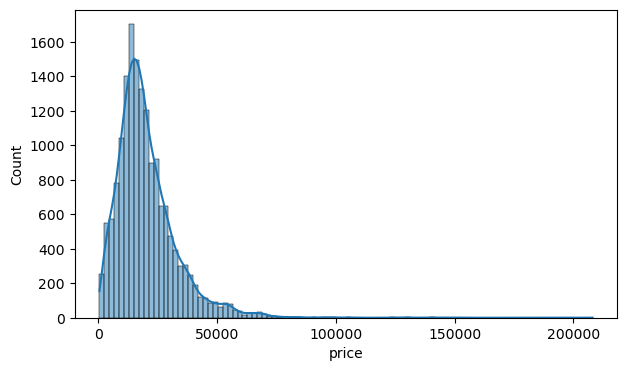

In [76]:
sns.histplot(df.price, bins=100, kde=True);

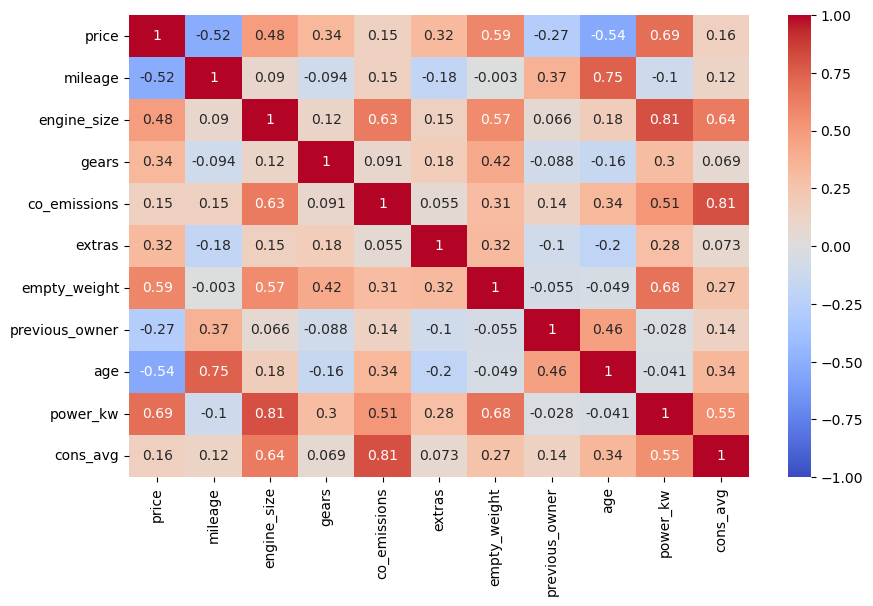

In [77]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot =True, cmap="coolwarm");

## Multicollinearity control

**I look for features with an absolute value of correlation greater than 0.9 or less than 0.1.**

In [78]:
df.corr(numeric_only=True)[(abs(df.corr(numeric_only=True))>= 0.9) & (abs(df.corr(numeric_only=True)) < 1)] .any().any()

False

**I also need to check the VIF Score for multicollinearity**

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
df_numeric = df.select_dtypes(include ="number")
X_vif = df_numeric.drop(columns='price')
X_vif.head()

,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kw,cons_avg
0,27150.0,1461.0,6.0,120.0,5,1330.0,2.0,2.0,85.0,4.5
1,157500.0,1991.0,6.0,138.0,6,1295.0,2.0,12.0,80.0,5.2
2,21734.0,1461.0,7.0,99.5,1,1445.0,2.0,2.0,85.0,3.9
3,172700.0,1461.0,7.0,99.5,1,1425.0,3.0,4.0,80.0,3.7
4,18989.0,1461.0,7.0,99.5,1,1455.0,2.0,2.0,85.0,3.9


In [81]:
df_vif = pd.DataFrame()
df_vif['features'] = X_vif.columns
df_vif

,features
0,mileage
1,engine_size
2,gears
3,co_emissions
4,extras
5,empty_weight
6,previous_owner
7,age
8,power_kw
9,cons_avg


In [82]:
df_vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

In [83]:
df_vif

,features,VIF
0,mileage,5.394386
1,engine_size,26.626795
2,gears,23.939570
3,co_emissions,23.243468
4,extras,2.948238
5,empty_weight,41.465184
6,previous_owner,4.937438
7,age,6.884142
8,power_kw,18.181950
9,cons_avg,25.071525


**The features engine size, gears, co_emissions, empty weight, power_kW, and average fuel consumption have a significant issue of multicollinearity with other features. Because they have a VIF score bigger than 10. So I need to use one of the regularization methods for feature selection**

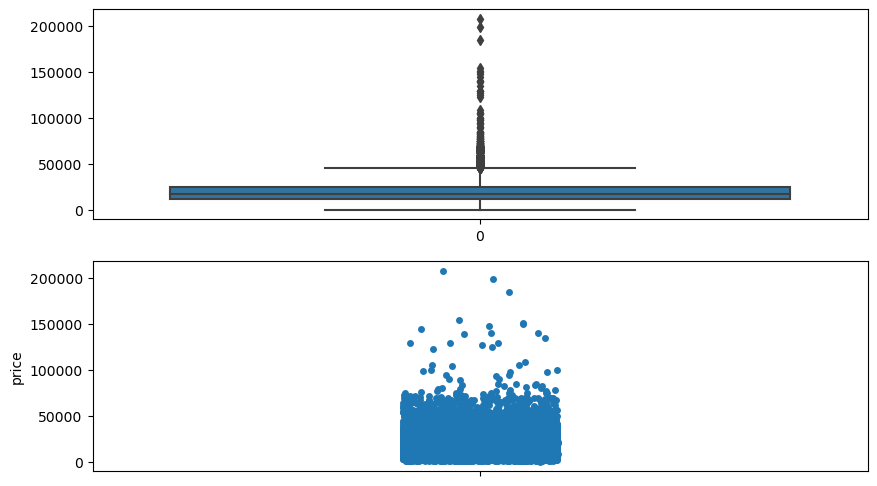

In [84]:
plt.figure(figsize=(10,6))

plt.subplot(211)
sns.boxplot(df.price)

plt.subplot(212)
sns.stripplot(df.price);

**When I look at boxplot, it looks like vehicles over 50000 dollars are outliers. However, when we look at the stripplot, we see that there are many vehicles above 50000. So I have to make a separate evaluation for each make_model group, not for the data as a whole**

In [85]:
from ipywidgets import interact

def box_strip(model):
    sns.boxplot(data = df[df.make_model==model],
                x= "make_model",
                y = "price",
                palette='bright')

    sns.stripplot(data = df[df.make_model==model],
                x= "make_model",
                y = "price",
                palette='Set1')
model = df.make_model.unique()
interact(box_strip, model=model);

interactive(children=(Dropdown(description='model', options=('Mercedes-Benz A 180', 'Opel Corsa', 'Opel Astra'…

**For each group, I look at how many data are outside the IQR of 1.5:**

In [86]:
total_outliers = []

for model in df.make_model.unique():

    car_prices = df[df["make_model"]== model]["price"]

    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5*IQR
    upper_lim = Q3 + 1.5*IQR

    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()

    total_outliers.append(count_of_outliers)

    print(f" The count of outlier for {model:<24} : {count_of_outliers:<2},\
    The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

 The count of outlier for Mercedes-Benz A 180      : 0 ,    The rate of outliers : 0.0
 The count of outlier for Opel Corsa               : 16,    The rate of outliers : 0.046
 The count of outlier for Opel Astra               : 10,    The rate of outliers : 0.016
 The count of outlier for Opel Adam                : 1 ,    The rate of outliers : 0.009
 The count of outlier for Opel Insignia            : 19,    The rate of outliers : 0.066
 The count of outlier for Opel Cascada             : 1 ,    The rate of outliers : 0.008
 The count of outlier for Opel Grandland X         : 1 ,    The rate of outliers : 0.007
 The count of outlier for Renault Megane           : 37,    The rate of outliers : 0.046
 The count of outlier for Renault Clio             : 7 ,    The rate of outliers : 0.019
 The count of outlier for Renault Captur           : 0 ,    The rate of outliers : 0.0
 The count of outlier for Renault Talisman         : 6 ,    The rate of outliers : 0.044
 The count of outlier for

## 2. Data Pre-Processing

### Train | Test Split

In [87]:
X= df.drop(columns="price")
y= df.price

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
df.select_dtypes(include="object")

,make_model,body_type,type,warranty,gearbox,fuel_type,seller,drivetrain,full_service_history,non_smoker_vehicle,upholstery,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,Compact,Used,Yes,Manual,Diesel,Dealer,Front,No,No,Part/Full Leather,unefficient,Standard,Plus,Safety Premium Package
1,Mercedes-Benz A 180,Compact,Used,No,Manual,Diesel,Dealer,Front,Yes,Yes,Cloth,unefficient,Premium,Standard,Safety Premium Plus Package
2,Mercedes-Benz A 180,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,No,No,Cloth,unefficient,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,No,No,Cloth,unefficient,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,Compact,Used,Yes,Automatic,Diesel,Dealer,Front,No,No,Cloth,unefficient,Standard,Standard,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16263,Volvo V40,Sedan,Used,No,Manual,Diesel,Private seller,Front,Yes,No,Cloth,efficient,Standard,Standard,Safety Premium Package
16264,Volvo S60,Sedan,Used,Yes,Manual,Benzine,Dealer,Front,No,No,Part/Full Leather,efficient,Standard,Standard,Safety Premium Package
16265,Volvo S90,Sedan,Used,Yes,Automatic,Diesel,Dealer,4WD,No,No,Part/Full Leather,efficient,Standard,Standard,Safety Premium Plus Package
16266,Volvo C30,Sedan,Used,Yes,Manual,Diesel,Dealer,Front,Yes,No,Cloth,unefficient,Standard,Standard,Safety Premium Package


### Converting Object Features into Numerical Features Using Make Column Transformer with OrdinalEncoder and OneHotEncoder

**I am separating categorical features for which I will use onehot encoder and ordinal encoder. For features that have a hierarchical relationship between them, I will use ordinal encoder:**

In [90]:
cat_onehot = ['make_model', 'body_type', 'gearbox', 'fuel_type', 'seller', 'drivetrain',
              'upholstery', 'energy_efficiency_class']
cat_ordinal = ['warranty', 'full_service_history', 'non_smoker_vehicle', 'type', 'comfort_&_convenience_Package', 'entertainment_&_media_Package',
               'safety_&_security_Package']
cat_for_warranty = ["No", "Yes"]
cat_for_full_service_history = ["No", "Yes"]
cat_for_non_smoker_vehicle = ["No", "Yes"]
cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [91]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                        (OrdinalEncoder(categories= [cat_for_warranty,
                                                     cat_for_full_service_history,
                                                     cat_for_non_smoker_vehicle,
                                                     cat_for_type,
                                                     cat_for_comfort,
                                                     cat_for_ent,
                                                     cat_for_safety]), cat_ordinal),
                         remainder='passthrough',
                         verbose_feature_names_out=False)

column_trans=column_trans.set_output(transform="pandas")

In [92]:
X_train.head()

,make_model,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,non_smoker_vehicle,upholstery,previous_owner,energy_efficiency_class,age,power_kw,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
8677,Skoda Octavia,Station wagon,Used,No,31481.0,Manual,Benzine,Dealer,1798.0,6.0,140.0,Front,5,1430.0,Yes,Yes,Cloth,1.0,unefficient,5.0,132.0,6.1,Premium,Standard,Safety Premium Package
13672,Ford Focus,Sedan,Used,Yes,27105.0,Manual,Benzine,Dealer,998.0,6.0,0.0,Front,13,1280.0,Yes,Yes,Cloth,2.0,efficient,4.0,103.0,0.0,Premium,Standard,Safety Premium Package
10359,Toyota Aygo,Convertible,Used,Yes,59000.0,Manual,Benzine,Dealer,998.0,5.0,93.0,Front,4,830.0,Yes,Yes,Part/Full Leather,1.0,efficient,7.0,51.0,4.1,Standard,Plus,Safety Premium Package
13636,Ford Focus,Sedan,Used,Yes,62804.0,Manual,Benzine,Dealer,998.0,6.0,108.0,Front,8,1280.0,Yes,Yes,Cloth,2.0,efficient,4.0,92.0,4.7,Premium,Standard,Safety Premium Package
11025,Nissan Micra,Compact,Used,Yes,1.0,Manual,Benzine,Dealer,898.0,5.0,104.0,Front,1,1076.0,No,No,Cloth,1.0,efficient,4.0,66.0,5.2,Standard,Standard,Safety Standard Package


In [93]:
X_test.head()

,make_model,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,non_smoker_vehicle,upholstery,previous_owner,energy_efficiency_class,age,power_kw,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
387,Opel Corsa,Compact,Used,No,21550.0,Automatic,Benzine,Dealer,1398.0,6.0,143.0,Front,7,1248.0,No,No,Cloth,1.0,unefficient,3.0,66.0,6.2,Premium,Standard,Safety Premium Package
1261,Opel Astra,Station wagon,Used,No,137000.0,Manual,Diesel,Dealer,1686.0,6.0,120.0,Front,5,1448.0,No,No,Cloth,1.0,efficient,9.0,96.0,7.3,Standard,Standard,Safety Premium Package
2546,Renault Kadjar,Off-Road/Pick-up,Used,Yes,8532.0,Manual,Benzine,Dealer,1332.0,6.0,140.0,Front,5,1295.0,No,No,Cloth,1.0,unefficient,1.0,103.0,5.9,Standard,Plus,Safety Premium Package
284,Opel Adam,Compact,Used,No,31170.0,Manual,Benzine,Dealer,1398.0,5.0,0.0,Front,2,1135.0,Yes,Yes,Part/Full Leather,1.0,unefficient,4.0,64.0,5.4,Standard,Standard,Safety Premium Package
7198,SEAT Arona,Off-Road/Pick-up,Used,No,45125.0,Manual,Benzine,Dealer,999.0,6.0,130.0,Front,11,1308.0,Yes,Yes,Cloth,1.0,efficient,4.0,85.0,5.2,Standard,Plus,Safety Premium Package


In [94]:
X_train.shape, X_test.shape

((13014, 25), (3254, 25))

In [95]:
column_trans.fit_transform(X_train).head()

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Micra,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Aygo,make_model_Toyota C-HR,make_model_Toyota Corolla,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,seller_Dealer,seller_Private seller,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,upholstery_Cloth,upholstery_Part/Full Leather,energy_efficiency_class_efficient,energy_efficiency_class_unefficient,warranty,full_service_history,non_smoker_vehicle,type,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kw,cons_avg
8677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,31481.0,1798.0,6.0,140.0,5,1430.0,1.0,5.0,132.0,6.1
13672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,27105.0,998.0,6.0,0.0,13,1280.0,2.0,4.0,103.0,0.0
10359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,59000.0,998.0,5.0,93.0,4,830.0,1.0,7.0,51.0,4.1
13636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,62804.0,998.0,6.0,108.0,8,1280.0,2.0,4.0,92.0,4.7
11025,0.0,0.0,0.0,0.0,0

In [96]:
X_train_trans = column_trans.fit_transform(X_train)
X_test_trans = column_trans.transform(X_test)

In [97]:
X_train_trans.shape, X_test_trans.shape

((13014, 105), (3254, 105))

**As we can see, the number of features has increased**

In [98]:
X_train_trans.head()

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Micra,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Aygo,make_model_Toyota C-HR,make_model_Toyota Corolla,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,seller_Dealer,seller_Private seller,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,upholstery_Cloth,upholstery_Part/Full Leather,energy_efficiency_class_efficient,energy_efficiency_class_unefficient,warranty,full_service_history,non_smoker_vehicle,type,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kw,cons_avg
8677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,31481.0,1798.0,6.0,140.0,5,1430.0,1.0,5.0,132.0,6.1
13672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,27105.0,998.0,6.0,0.0,13,1280.0,2.0,4.0,103.0,0.0
10359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,59000.0,998.0,5.0,93.0,4,830.0,1.0,7.0,51.0,4.1
13636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,62804.0,998.0,6.0,108.0,8,1280.0,2.0,4.0,92.0,4.7
11025,0.0,0.0,0.0,0.0,0

In [99]:
X_train_trans.join(y_train).corr()

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Micra,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Aygo,make_model_Toyota C-HR,make_model_Toyota Corolla,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,seller_Dealer,seller_Private seller,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,upholstery_Cloth,upholstery_Part/Full Leather,energy_efficiency_class_efficient,energy_efficiency_class_unefficient,warranty,full_service_history,non_smoker_vehicle,type,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kw,cons_avg,price
make_model_Dacia Duster,1.000000,-0.013715,-0.023740,-0.021482,-0.014448,-0.019026,-0.010982,-0.019647,-0.021867,-0.023578,-0.015769,-0.012942,-0.025641,-0.015675,-0.013499,-0.026060,-0.011180,-0.011374,-0.011816,-0.019532,-0.022246,-0.011816,-0.011180,-0.027541,-0.012362,-0.020399,-0.012771,-0.018588,-0.012655,-0.011940,-0.013055,-0.017211,-0.015628,-0.024566,-0.015293,-0.014242,-0.013607,-0.021127,-0.012243,-0.031428,-0.012421,-0.014242,-0.014801,-0.022212,-0.029657,-0.016906,-0.012303,-0.012942,-0.019686,-0.014345,-0.015147,-0.013715,-0.010982,-0.011629,-0.014294,-0.017681,-0.012362,-0.017891,-0.011374,-0.010982,-0.017681,-0.013389,-0.010982,-0.011310,-0.014600,-0.011754,-0.067747,-0.044938,-0.045858,0.264103,-0.068369,-0.052326,-0.081764,0.082175,-0.005767,-0.068756,0.052050,-0.006805,0.067842,0.031509,-0.031509,0.047321,-0.023171,-0.028310,0.045708,-0.045708,-0.118431,0.118431,0.016121,-0.040349,-0.037870,-0.000504,0.026893,-0.043234,0.020929,-0.034480,-0.047621,0.003300,-0.006971,-0.060406,-0.033077,-0.047878,-0.051169,-0.058891,-0.009266,-0.034061
make_model_Dacia Logan,-0.013715,1.000000,-0.017329,-0.015682,-0.010547,-0.013889,-0.008016,-0.014342,-0.015963,-0.017211,-0.011511,-0.009448,-0.018717,-0.011443,-0.009854,-0.019023,-0.008161,-0.008303,-0.008626,-0.014258,-0.016239,-0.008626,-0.008161,-0.020104,-0.009024,-0.014891,-0.009323,-0.013569,-0.009238,-0.008716,-0.009530,-0.012564,-0.011408,-0.017932,-0.011163,-0.010396,-0.009933,-0.015422,-0.008937,-0.022942,-0.009067,-0.010396,-0.010805,-0.016214,-0.021649,-0.012341,-0.008981,-0.009448,-0.014370,-0.010472,-0.011057,-0.010012,-0.008016,-0.008489,-0.010434,-0.012907,-0.009024,-0.013060,-0.008303,-0.008016,-0.012907,-0.009774,-0.008016,-0.008256,-0.010658,-0.008580,-0.0299

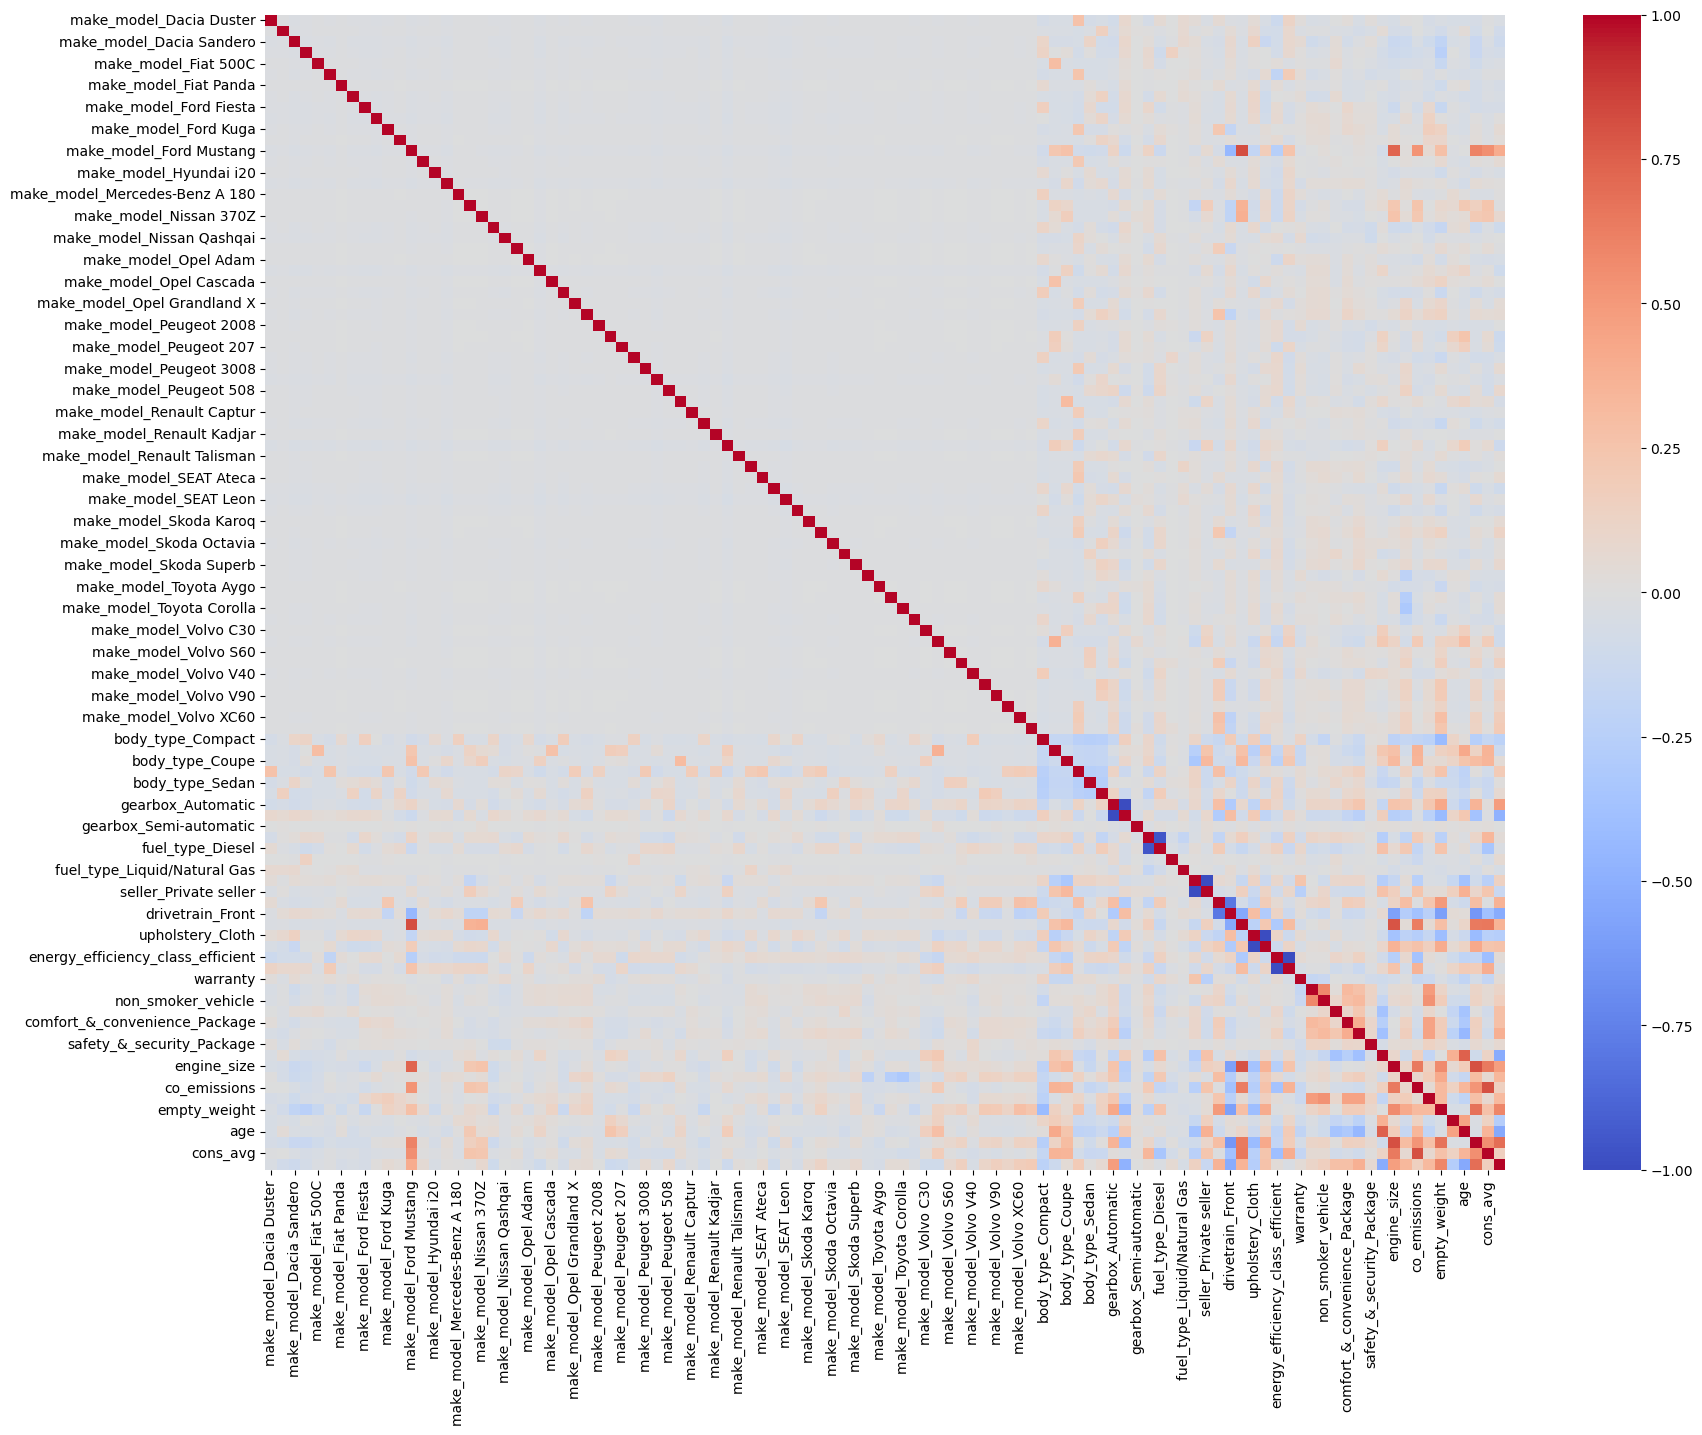

In [100]:
plt.figure(figsize=(20,15))
sns.heatmap(X_train_trans.join(y_train).corr(), vmin=-1, vmax=1, cmap="coolwarm");

## Scaling

In [101]:
scaler = MinMaxScaler().set_output(transform="pandas")
scaler.fit(X_train_trans)

X_train_scaled = scaler.transform(X_train_trans)
X_test_scaled = scaler.transform(X_test_trans)

In [102]:
X_train_scaled.head()

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Micra,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Aygo,make_model_Toyota C-HR,make_model_Toyota Corolla,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,seller_Dealer,seller_Private seller,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,upholstery_Cloth,upholstery_Part/Full Leather,energy_efficiency_class_efficient,energy_efficiency_class_unefficient,warranty,full_service_history,non_smoker_vehicle,type,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kw,cons_avg
8677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.5,0.0,0.5,0.075858,0.267518,0.714286,0.350877,0.16,0.357664,0.000,0.25,0.236702,0.363095
13672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.5,0.0,0.5,0.065313,0.121533,0.714286,0.000000,0.48,0.284672,0.125,0.20,0.159574,0.000000
10359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.5,0.142169,0.121533,0.571429,0.233083,0.12,0.065693,0.000,0.35,0.021277,0.244048
13636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.

In [103]:
X_test_scaled.head()

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Micra,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Aygo,make_model_Toyota C-HR,make_model_Toyota Corolla,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,seller_Dealer,seller_Private seller,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,upholstery_Cloth,upholstery_Part/Full Leather,energy_efficiency_class_efficient,energy_efficiency_class_unefficient,warranty,full_service_history,non_smoker_vehicle,type,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kw,cons_avg
387,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.5,0.0,0.5,0.051928,0.194526,0.714286,0.358396,0.24,0.269100,0.0,0.15,0.061170,0.369048
1261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.330120,0.247080,0.714286,0.300752,0.16,0.366423,0.0,0.45,0.140957,0.434524
2546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,0.020559,0.182482,0.714286,0.350877,0.16,0.291971,0.0,0.05,0.159574,0.351190
284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0

## 3. Linear Regression

In [104]:
def train_val(model, X_train, y_train, X_test, y_test):
  
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)

def adj_r2(y_test, y_pred, X):
   
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]  
    p = X.shape[1]   
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


In [105]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [106]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,8.363961e-01,8.215867e-01
mae,2.897836e+03,2.927025e+03
mse,2.715324e+07,3.122378e+07
rmse,5.210877e+03,5.587824e+03


In [108]:
pd.options.display.float_format = '{:.3f}'.format

train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.836,0.822
mae,2897.836,2927.025
mse,27153239.359,31223782.061
rmse,5210.877,5587.824


**Adjusted R2 Score**

**There are too many features in our data, but not enough rows,so I want to use the adjusted R2 Score to get the real R2 score. I will use the user defined function and see the trade off between the number of rows and features**

In [109]:
y_pred = lm.predict(X_test_scaled)
y_train_pred=lm.predict(X_train_scaled)

In [110]:
print("test adj_R2 score  :", adj_r2(y_test, y_pred, X_test_scaled))
print("train adj_R2 score :", adj_r2(y_train, y_train_pred, X_train_scaled))

test adj_R2 score  : 0.8156358395443917
train adj_R2 score : 0.8350652731323909


**There is a slight drop in the test R2 Score.**

## Cross Validate

**I need to control the overfitting with cross validate**

In [111]:
model = LinearRegression()

scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error',
                                'neg_mean_absolute_percentage_error'],
                        cv =10,
                        return_train_score=True,
                       )


In [112]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
0,0.073,0.016,0.832,0.837,-3056.343,-2886.651,-30895098.968,-26769753.483,-5558.336,-5173.950,-0.221,-0.210
1,0.069,0.013,0.880,0.832,-2739.341,-2943.226,-17257172.332,-28296102.906,-4154.175,-5319.408,-0.203,-0.213
2,0.077,0.008,0.853,0.835,-2963.167,-2902.954,-23558138.682,-27562603.963,-4853.673,-5250.010,-0.211,-0.211
3,0.064,0.016,0.763,0.846,-3146.723,-2854.141,-47970720.981,-24894802.678,-6926.090,-4989.469,-0.210,-0.207
4,0.087,0.017,0.867,0.833,-2857.816,-2915.558,-19087388.412,-28074412.673,-4368.912,-5298.529,-0.207,-0.211
5,0.071,0.022,0.876,0.832,-2894.846,-2915.013,-18142723.772,-28201518.468,-4259.428,-5310.510,-0.219,-0.211
6,0.081,0.013,0.861,0.834,-2887.667,-2911.136,-22310104.911,-27726403.359,-4723.357,-5265.587,-0.218,-0.211
7,0.076,0.015,0.789,0.842,-2944.288,-2880.758,-38145109.523,-25965264.441,-6176.173,-5095.612,-0.196,-0.210
8,0.069,0.015,0.778,0.844,-3042.607,-2874.937,-44351209.457,-25305084.952,-6659.670,-5030.416,-0.221,-0.209
9,0.078,0.012,0.891,0.831,-2737.799,-2935.710,-15070936.789,-28525259.527,-3882.130,-5340.904,-0.215,-0.212


In [113]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                            0.839
train_r2                                           0.837
test_neg_mean_absolute_error                   -2927.060
train_neg_mean_absolute_error                  -2902.009
test_neg_mean_squared_error                -27678860.383
train_neg_mean_squared_error               -27132120.645
test_neg_root_mean_squared_error               -5156.194
train_neg_root_mean_squared_error              -5207.440
test_neg_mean_absolute_percentage_error           -0.212
train_neg_mean_absolute_percentage_error          -0.210
dtype: float64

**The scores we found above and the scores we found as a result of validation are very close to each other, we can say that there is no overfitting.**

## Prediction Error

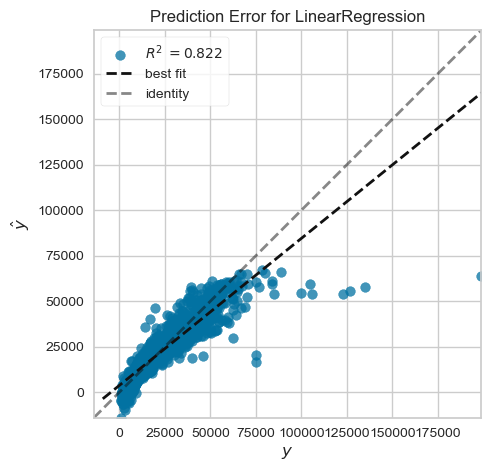

In [114]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test) 
visualizer.show();


**Cars costing more than 70000 euros are pulling down our best fit line. Very low priced cars break my scores too.**

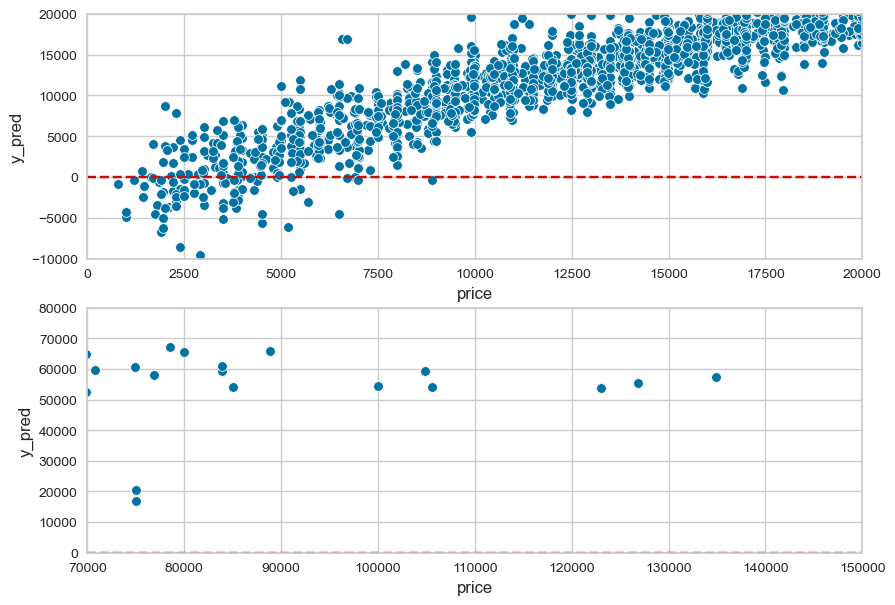

In [115]:
y_pred=lm.predict(X_test_scaled)


plt.figure(figsize=(10,7))
plt.subplot(211)

sns.scatterplot(x = y_test, y = y_pred) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("y_pred")
plt.xlim([0,20000])
plt.ylim([-10000,20000])

plt.subplot(212)

sns.scatterplot(x = y_test, y = y_pred) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("y_pred")
plt.xlim([70000, 150000])
plt.ylim([0,80000])
plt.show();

**Here in the graph I can see that my model does not learn well for cars costing more than 70000 and less than 7500.**

## Residual Plot

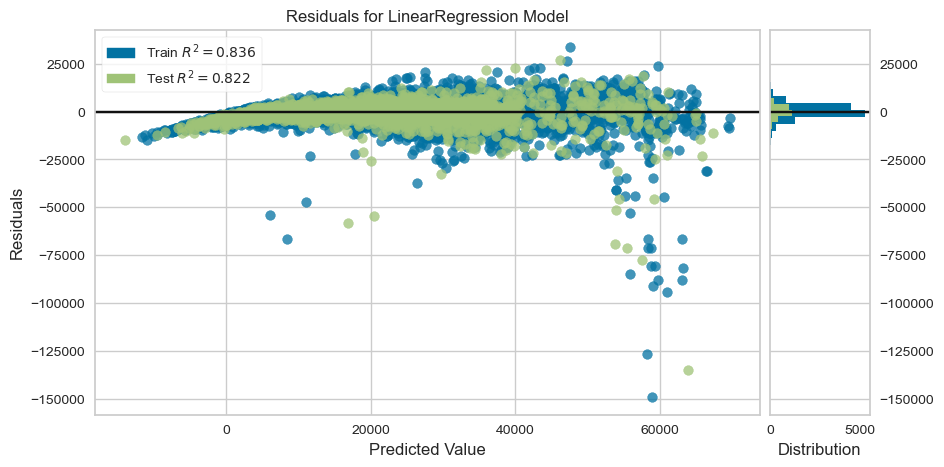

In [116]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train) 
visualizer.score(X_test_scaled, y_test) 
visualizer.show();

**When I look at the distribution of points in the residual plot, I see that cars cheaper than 7500 and cars more expensive than 70000 are not very suitable data to use linear regression**

**So I will drop the cars below 7500 Euro and above 70000 Euro and I'll review my scores again.**

## Dropping outliers that worsen my predictions from the dataset

In [117]:
df = df[(df.price > 7500)&(df.price <70000)]
df

,make_model,price,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,non_smoker_vehicle,upholstery,previous_owner,energy_efficiency_class,age,power_kw,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 180,24400.000,Compact,Used,Yes,27150.000,Manual,Diesel,Dealer,1461.000,6.000,120.000,Front,5,1330.000,No,No,Part/Full Leather,2.000,unefficient,2.000,85.000,4.500,Standard,Plus,Safety Premium Package
2,Mercedes-Benz A 180,29800.000,Compact,Used,Yes,21734.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1445.000,No,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package
3,Mercedes-Benz A 180,21000.000,Compact,Used,Yes,172700.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1425.000,No,No,Cloth,3.000,unefficient,4.000,80.000,3.700,Standard,Standard,Safety Standard Package
4,Mercedes-Benz A 180,26800.000,Compact,Used,Yes,18989.000,Automatic,Diesel,Dealer,1461.000,7.000,99.500,Front,1,1455.000,No,No,Cloth,2.000,unefficient,2.000,85.000,3.900,Standard,Standard,Safety Premium Package
5,Mercedes-Benz A 180,32900.000,Compact,Pre-registered,Yes,25.000,Manual,Benzine,Dealer,1332.000,6.000,126.000,Front,1,1350.000,No,No,Cloth,1.000,unefficient,1.000,100.000,0.000,Standard,Standard,Safety Premium Package
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16261,Volvo S60,33500.000,Sedan,Used,Yes,53000.000,Automatic,Benzine,Dealer,1969.000,8.000,168.000,4WD,9,1773.000,Yes,No,Part/Full Leather,2.000,efficient,3.000,228.000,7.400,Premium,Plus,Safety Premium Package
16262,Volvo S90,38000.000,Sedan,Used,No,44873.000,Automatic,Benzine,Private seller,1969.000,8.000,49.000,4WD,17,1930.000,Yes,Yes,Part/Full Leather,1.000,efficient,4.000,228.000,7.600,Premium,Plus,Safety Premium Package
16263,Volvo V40,13000.000,Sedan,Used,No,114000.000,Manual,Diesel,Private seller,1969.000,6.000,94.000,Front,9,1532.000,Yes,No,Cloth,1.000,efficient,4.000,88.000,3.600,Standard,Standard,Safety Premium Package
16265,Volvo S90,37600.000,Sedan,Used,Yes,40345.000,Automatic,Diesel,Dealer,1969.000,8.000,127.000,4WD,1,2077.000,No,No,Part/Full Leather,2.000,efficient,3.000,288.000,2.000,Standard,Standard,Safety Premium Plus Package


In [118]:
X = df.drop(columns = "price")
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
X_train= column_trans.fit_transform(X_train)
X_test= column_trans.transform(X_test)

In [120]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [121]:
lm2 = LinearRegression()
lm2.fit(X_train_scaled, y_train)

LinearRegression()

In [122]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.881,0.877
mae,2605.300,2650.699
mse,14381121.627,14865525.362
rmse,3792.245,3855.584


**After dropping the outliers, I can see that I got better scores than the scores I got above**

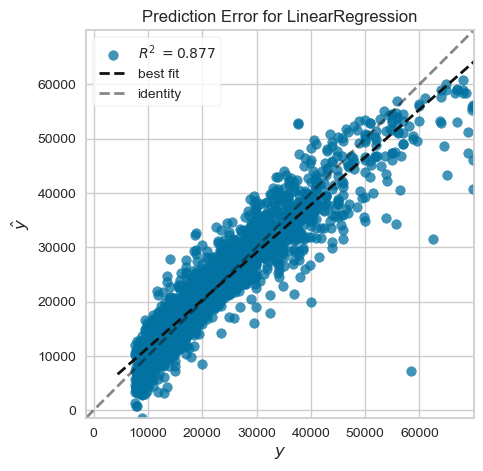

In [123]:
visualizer = RadViz(size=(500, 1000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train_scaled, y_train) 
visualizer.score(X_test_scaled, y_test) 
visualizer.show();

**When I look at the prediction error graph, I can clearly see that after removing the outliers, the best fit line and the identity line are closer to each other and the degree of the angle between them has decreased.**

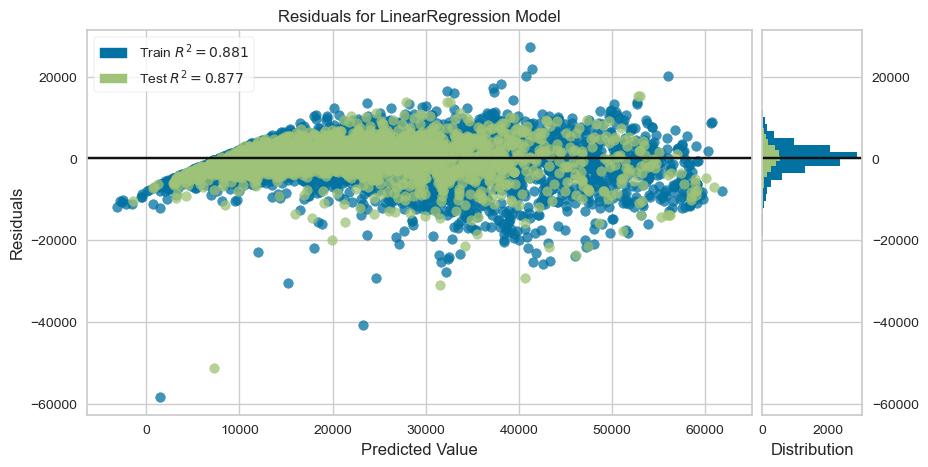

In [124]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 500))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train) 
visualizer.score(X_test_scaled, y_test) 
visualizer.show();

**The distribution of Residuals around 7500 euros is still not quite suitable for linear regression, in fact**

In [125]:
model = LinearRegression()

scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring=['r2',
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error',
                                'neg_mean_absolute_percentage_error'],
                        cv =10,
                        return_train_score=True)

pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                            0.878
train_r2                                           0.881
test_neg_mean_absolute_error                   -2630.749
train_neg_mean_absolute_error                  -2603.923
test_neg_mean_squared_error                -14717263.268
train_neg_mean_squared_error               -14363015.147
test_neg_root_mean_squared_error               -3830.865
train_neg_root_mean_squared_error              -3789.782
test_neg_mean_absolute_percentage_error           -0.133
train_neg_mean_absolute_percentage_error          -0.132
dtype: float64

In [126]:
train_val(lm2, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.881,0.877
mae,2605.300,2650.699
mse,14381121.627,14865525.362
rmse,3792.245,3855.584


**I can see that there is no overfitting for my new data set, since the test and train scores and the scores from validation are close**

In [127]:
y_pred = lm2.predict(X_test_scaled)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lm_mape= mean_absolute_percentage_error(y_test, y_pred)

## Pipeline

In [128]:
X = df.drop(columns = ["price"])
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
X_train.head()

,make_model,body_type,type,warranty,mileage,gearbox,fuel_type,seller,engine_size,gears,co_emissions,drivetrain,extras,empty_weight,full_service_history,non_smoker_vehicle,upholstery,previous_owner,energy_efficiency_class,age,power_kw,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
195,Opel Corsa,Compact,Used,No,36508.000,Manual,Benzine,Dealer,1364.000,5.000,150.000,Front,8,1055.000,Yes,Yes,Cloth,1.000,unefficient,4.000,110.000,6.300,Standard,Standard,Safety Premium Package
13911,Hyundai i30,Compact,Used,Yes,18335.000,Manual,Diesel,Dealer,1582.000,6.000,104.000,Front,1,1263.000,No,No,Cloth,1.000,unefficient,3.000,85.000,3.800,Standard,Standard,Safety Premium Package
13384,Ford Focus,Station wagon,Used,Yes,10890.000,Manual,Diesel,Dealer,1498.000,6.000,96.000,Front,14,1395.000,Yes,Yes,Cloth,1.000,efficient,1.000,88.000,3.600,Premium,Plus,Safety Premium Package
2720,Renault Captur,Off-Road/Pick-up,Used,No,71991.000,Automatic,Benzine,Dealer,1197.000,6.000,125.000,Front,4,1177.000,Yes,No,Cloth,1.000,unefficient,4.000,88.000,5.500,Premium,Plus,Safety Premium Package
14828,Volvo V40,Compact,Used,Yes,145040.000,Manual,Diesel,Dealer,1969.000,6.000,89.000,Front,1,1423.000,No,No,Cloth,1.000,efficient,4.000,88.000,3.400,Standard,Standard,Safety Premium Plus Package


In [130]:
cat_onehot = ['make_model', 'body_type', 'gearbox', 'fuel_type', 'seller', 'drivetrain',
              'upholstery', 'energy_efficiency_class']
cat_ordinal = ['warranty', 'full_service_history', 'non_smoker_vehicle', 'type', 'comfort_&_convenience_Package', 'entertainment_&_media_Package',
               'safety_&_security_Package']
cat_for_warranty = ["No", "Yes"]
cat_for_full_service_history = ["No", "Yes"]
cat_for_non_smoker_vehicle = ["No", "Yes"]
cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]
cat_for_comfort = ['Standard', 'Premium', 'Premium Plus']
cat_for_ent = ['Standard', 'Plus']
cat_for_safety = ['Safety Standard Package', 'Safety Premium Package', 'Safety Premium Plus Package']

In [133]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)
enc_ordinal = OrdinalEncoder(categories= [cat_for_warranty,
                                          cat_for_full_service_history,
                                          cat_for_non_smoker_vehicle,
                                          cat_for_type,
                                          cat_for_comfort,
                                          cat_for_ent,
                                          cat_for_safety])

column_trans = make_column_transformer((enc_onehot, cat_onehot),
                                       (enc_ordinal, cat_ordinal),
                                        remainder='passthrough', 
                                        verbose_feature_names_out=False).set_output(transform="pandas")

In [134]:
column_trans.fit_transform(X_train)

,make_model_Dacia Duster,make_model_Dacia Logan,make_model_Dacia Sandero,make_model_Fiat 500,make_model_Fiat 500C,make_model_Fiat 500X,make_model_Fiat Panda,make_model_Fiat Tipo,make_model_Ford Fiesta,make_model_Ford Focus,make_model_Ford Kuga,make_model_Ford Mondeo,make_model_Ford Mustang,make_model_Hyundai TUCSON,make_model_Hyundai i20,make_model_Hyundai i30,make_model_Mercedes-Benz A 180,make_model_Nissan 350Z,make_model_Nissan 370Z,make_model_Nissan Micra,make_model_Nissan Qashqai,make_model_Nissan X-Trail,make_model_Opel Adam,make_model_Opel Astra,make_model_Opel Cascada,make_model_Opel Corsa,make_model_Opel Grandland X,make_model_Opel Insignia,make_model_Peugeot 2008,make_model_Peugeot 206,make_model_Peugeot 207,make_model_Peugeot 208,make_model_Peugeot 3008,make_model_Peugeot 308,make_model_Peugeot 508,make_model_Peugeot RCZ,make_model_Renault Captur,make_model_Renault Clio,make_model_Renault Kadjar,make_model_Renault Megane,make_model_Renault Talisman,make_model_SEAT Arona,make_model_SEAT Ateca,make_model_SEAT Ibiza,make_model_SEAT Leon,make_model_Skoda Fabia,make_model_Skoda Karoq,make_model_Skoda Kodiaq,make_model_Skoda Octavia,make_model_Skoda Scala,make_model_Skoda Superb,make_model_Toyota Auris,make_model_Toyota Aygo,make_model_Toyota C-HR,make_model_Toyota Corolla,make_model_Toyota Yaris,make_model_Volvo C30,make_model_Volvo C70,make_model_Volvo S60,make_model_Volvo S90,make_model_Volvo V40,make_model_Volvo V60,make_model_Volvo V90,make_model_Volvo XC40,make_model_Volvo XC60,make_model_Volvo XC90,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road/Pick-up,body_type_Sedan,body_type_Station wagon,gearbox_Automatic,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,seller_Dealer,seller_Private seller,drivetrain_4WD,drivetrain_Front,drivetrain_Rear,upholstery_Cloth,upholstery_Part/Full Leather,energy_efficiency_class_efficient,energy_efficiency_class_unefficient,warranty,full_service_history,non_smoker_vehicle,type,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package,mileage,engine_size,gears,co_emissions,extras,empty_weight,previous_owner,age,power_kw,cons_avg
195,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,36508.000,1364.000,5.000,150.000,8,1055.000,1.000,4.000,110.000,6.300
13911,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,18335.000,1582.000,6.000,104.000,1,1263.000,1.000,3.000,85.000,3.800
13384,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.0

In [135]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

ridge_pipe = Pipeline(steps=operations).set_output(transform="pandas")

ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'seller', 'drivetrain',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             [...
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['warranty',
                                                   'full_service_history',
                                                   'non_smoker_vehicle', 'type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

**I am going to use both Ridge and Lasso regularization techniques**

## 4. Implement Ridge Regression

## Ridge

In [136]:
from sklearn.linear_model import Ridge

In [137]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'seller', 'drivetrain',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             [...
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['warranty',
                                                   'full_service_history',
                                                   'non_smoker_vehicle', 'type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

In [138]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.881,0.877
mae,2602.667,2645.551
mse,14387618.824,14846878.627
rmse,3793.101,3853.165


## Cross Validation

In [139]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [140]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error
1,0.233,0.061,0.882,0.881,-2624.821,-2605.003,-13614441.991,-14490844.689,-3689.775,-3806.684,-0.133,-0.131
2,0.269,0.070,0.883,0.881,-2523.389,-2617.554,-13213576.847,-14526363.170,-3635.048,-3811.347,-0.130,-0.132
3,0.251,0.057,0.882,0.881,-2554.410,-2612.859,-13780722.481,-14474128.018,-3712.240,-3804.488,-0.131,-0.132
4,0.274,0.053,0.873,0.882,-2636.629,-2598.205,-14943676.298,-14347952.143,-3865.705,-3787.869,-0.132,-0.131
5,0.276,0.047,0.876,0.881,-2542.415,-2611.164,-14037676.221,-14458452.733,-3746.689,-3802.427,-0.129,-0.132
6,0.252,0.064,0.872,0.882,-2668.492,-2594.090,-15995092.573,-14237222.460,-3999.387,-3773.224,-0.132,-0.131
7,0.237,0.048,0.881,0.881,-2598.121,-2608.623,-13465600.347,-14504988.256,-3669.550,-3808.541,-0.139,-0.131
8,0.255,0.054,0.885,0.880,-2765.772,-2585.341,-16048934.945,-14233969.389,-4006.112,-3772.793,-0.132,-0.131
9,0.245,0.058,0.852,0.884,-2725.315,-2585.034,-18632608.201,-13937636.736,-4316.550,-3733.314,-0.138,-0.131
10,0.220,0.063,0.895,0.879,-2647.835,-2598.986,-13446685.208,-14505022.242,-3666.972,-3808.546,-0.132,-0.131


In [141]:
scores.iloc[:,2:].mean()

test_r2                                            0.878
train_r2                                           0.881
test_neg_mean_absolute_error                   -2628.720
train_neg_mean_absolute_error                  -2601.686
test_neg_mean_squared_error                -14717901.511
train_neg_mean_squared_error               -14371657.984
test_neg_root_mean_squared_error               -3830.803
train_neg_root_mean_squared_error              -3790.923
test_neg_mean_absolute_percentage_error           -0.133
train_neg_mean_absolute_percentage_error          -0.131
dtype: float64

## Finding best alpha for Ridge

In [142]:
from sklearn.model_selection import GridSearchCV

**I'll create 100 values between 0.001 and 100 to find the best alpha.**

In [143]:
alpha_space = np.linspace(0.001, 100, 100)

In [145]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha': alpha_space} 

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                                param_grid=param_grid,
                                scoring='neg_root_mean_squared_error',
                                cv=10,
                                n_jobs=-1,
                                return_train_score=True)

In [146]:
pipe_model.get_params()

{'memory': None,
 'steps': [('OneHot_Ordinal_Encoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    ['make_model', 'body_type', 'gearbox',
                                     'fuel_type', 'seller', 'drivetrain',
                                     'upholstery', 'energy_efficiency_class']),
                                   ('ordinalencoder',
                                    OrdinalEncoder(categories=[['No', 'Yes'],
                                                               ['No', 'Yes'],
                                                               ['No', 'Yes'],
                                                               ['Used',
                                                                "Employee's car",
                                   

In [147]:
ridge_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'seller',
                                                                          'drivetrain',
                                                                          'upholstery',
                                                                          'energy_efficiency_class']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [148]:
ridge_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'seller', 'drivetrain',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             [...
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['warranty',
                                                   'full_service_history',
                                                   'non_smoker_vehicle', 'type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('Ridge', Ridge(alpha=1.011090909090909))])

In [149]:
pd.DataFrame(ridge_grid_model.cv_results_).loc[ridge_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3830.813
mean_train_score   -3790.949
Name: 1, dtype: object

In [150]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.881,0.877
mae,2602.654,2645.518
mse,14387782.153,14846908.697
rmse,3793.123,3853.169


In [151]:
y_pred = ridge_grid_model.predict(X_test)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = mean_squared_error(y_test, y_pred, squared=False)
rm_mape= mean_absolute_percentage_error(y_test, y_pred)

In [152]:
ridge_grid_model.best_estimator_["Ridge"].coef_

array([-1.86841960e+03, -3.21434396e+03, -4.18323510e+03, -2.94236752e+03,
       -6.36023105e+02, -1.02352619e+03, -2.88471934e+03, -3.72978203e+03,
       -2.98359018e+03, -1.38864854e+03, -9.03814154e+02, -6.66203293e+02,
       -5.20717126e+03,  1.65508241e+03, -3.11894269e+03, -2.69940349e+03,
        4.31551467e+03, -3.86482737e+03, -7.89669457e+03, -3.39331367e+03,
        1.39934948e+03,  8.83541506e+02, -3.93858817e+03, -3.41412793e+03,
       -8.18707974e+02, -4.14190855e+03, -3.63118599e+02, -1.75691442e+03,
        2.10222661e+02,  4.78689648e+03, -1.74776349e+03, -2.09573986e+03,
        3.22482328e+03, -5.57300371e+02,  3.48308271e+03, -2.30056148e+02,
       -1.04273123e+03, -2.47347182e+03, -3.68053767e+02, -5.22717740e+02,
       -5.70307251e+02, -1.39805120e+03,  2.04852154e+03, -2.51713213e+03,
       -2.42066860e+03, -2.61880951e+03,  3.98391371e+03,  7.55400245e+03,
        2.11616554e+02, -1.75722612e+03,  2.63772184e+03, -6.97130833e+02,
       -4.00463563e+03, -

In [153]:
ridge_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out()

array(['make_model_Dacia Duster', 'make_model_Dacia Logan',
       'make_model_Dacia Sandero', 'make_model_Fiat 500',
       'make_model_Fiat 500C', 'make_model_Fiat 500X',
       'make_model_Fiat Panda', 'make_model_Fiat Tipo',
       'make_model_Ford Fiesta', 'make_model_Ford Focus',
       'make_model_Ford Kuga', 'make_model_Ford Mondeo',
       'make_model_Ford Mustang', 'make_model_Hyundai TUCSON',
       'make_model_Hyundai i20', 'make_model_Hyundai i30',
       'make_model_Mercedes-Benz A 180', 'make_model_Nissan 350Z',
       'make_model_Nissan 370Z', 'make_model_Nissan Micra',
       'make_model_Nissan Qashqai', 'make_model_Nissan X-Trail',
       'make_model_Opel Adam', 'make_model_Opel Astra',
       'make_model_Opel Cascada', 'make_model_Opel Corsa',
       'make_model_Opel Grandland X', 'make_model_Opel Insignia',
       'make_model_Peugeot 2008', 'make_model_Peugeot 206',
       'make_model_Peugeot 207', 'make_model_Peugeot 208',
       'make_model_Peugeot 3008', 'make_mo

In [154]:
pd.DataFrame(data= ridge_grid_model.best_estimator_["Ridge"].coef_,
             index=ridge_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(),
             columns=["Coef"]).sort_values("Coef")


,Coef
mileage,-23398.516
age,-19985.201
make_model_Nissan 370Z,-7896.695
make_model_Ford Mustang,-5207.171
make_model_Dacia Sandero,-4183.235
make_model_Opel Corsa,-4141.909
make_model_Toyota Aygo,-4004.636
make_model_Opel Adam,-3938.588
make_model_Nissan 350Z,-3864.827
make_model_Fiat Tipo,-3729.782


## 5. Implement Lasso Regression

**Now I am going to implement Lasso**

In [155]:
from sklearn.linear_model import Lasso

In [156]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'seller', 'drivetrain',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             [...
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['warranty',
                                                   'full_service_history',
                                                   'non_smoker_vehicle', 'type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso())])

In [157]:
train_val(lasso_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.881,0.877
mae,2604.144,2643.257
mse,14413168.831,14861264.044
rmse,3796.468,3855.031


## Cross Validation

In [158]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

pipe_model = Pipeline(steps=operations)
scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [159]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.878
train_r2                                           0.881
test_neg_mean_absolute_error                   -2630.478
train_neg_mean_absolute_error                  -2602.944
test_neg_mean_squared_error                -14741486.258
train_neg_mean_squared_error               -14393641.595
test_neg_root_mean_squared_error               -3833.694
train_neg_root_mean_squared_error              -3793.823
test_neg_mean_absolute_percentage_error           -0.133
train_neg_mean_absolute_percentage_error          -0.131
dtype: float64

**Scores are really close to each other**

## Finding best alpha for Lasso

In [160]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha':alpha_space} # Parameter names should be used together with the model name defined in the pipeline.

lasso_grid_model = GridSearchCV(estimator=model,
                                param_grid=param_grid,
                                scoring='neg_root_mean_squared_error',
                                cv=10,
                                n_jobs=-1,
                                return_train_score=True)

In [161]:
lasso_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'gearbox',
                                                                          'fuel_type',
                                                                          'seller',
                                                                          'drivetrain',
                                                                          'upholstery',
                                                                          'energy_efficiency_class']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [162]:
lasso_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'gearbox', 'fuel_type',
                                                   'seller', 'drivetrain',
                                                   'upholstery',
                                                   'energy_efficiency_class']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['No',
                                                                              'Yes'],
                                                                             [...
                                                                             ['Standard',
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Package',
                                                                              'Safety '
                                                                              'Premium '
                                                                              'Plus '
                                                                              'Package']]),
                                                  ['warranty',
                                                   'full_service_history',
                                                   'non_smoker_vehicle', 'type',
                                                   'comfort_&_convenience_Package',
                                                   'entertainment_&_media_Package',
                                                   'safety_&_security_Package'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=0.001))])

**Let's look at the averages of the scores we get when we use the best indexes given by the grid model:**

In [164]:
pd.DataFrame(lasso_grid_model.cv_results_).loc[lasso_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -3831.213
mean_train_score   -3789.591
Name: 0, dtype: object

In [165]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.881,0.877
mae,2604.841,2649.283
mse,14379275.501,14852693.725
rmse,3792.002,3853.919


In [166]:
y_pred = lasso_grid_model.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = mean_squared_error(y_test, y_pred, squared=False)
lasm_mape= mean_absolute_percentage_error(y_test, y_pred)

In [167]:
pd.DataFrame(data=lasso_grid_model.best_estimator_["Lasso"].coef_,
             index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(),
             columns=["Coef"]).sort_values("Coef")

,Coef
mileage,-23657.385
age,-20093.989
make_model_Nissan 370Z,-9644.833
make_model_Ford Mustang,-6905.141
make_model_Nissan 350Z,-5468.283
make_model_Dacia Sandero,-4413.234
make_model_Opel Corsa,-4376.432
make_model_Toyota Aygo,-4366.845
make_model_Opel Adam,-4213.353
make_model_Fiat Tipo,-3880.345


## Feature Importance

**I'll use Lasso to select the most important features**

In [168]:
df_feat_imp =pd.DataFrame(
                         data=lasso_grid_model.best_estimator_["Lasso"].coef_,
                         index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(),
                         columns=["Coef"]
                         ).sort_values("Coef")

In [169]:
df_feat_imp

,Coef
mileage,-23657.385
age,-20093.989
make_model_Nissan 370Z,-9644.833
make_model_Ford Mustang,-6905.141
make_model_Nissan 350Z,-5468.283
make_model_Dacia Sandero,-4413.234
make_model_Opel Corsa,-4376.432
make_model_Toyota Aygo,-4366.845
make_model_Opel Adam,-4213.353
make_model_Fiat Tipo,-3880.345


**I select 6 most important features and assign them to a new df:**

**"power_kw", "mileage", "age", "engine_size" are the features I should naturally select. In addition to these, I choose the make_model feature because some observations in the make_model feature have a big impact on my prediction. I will keep the type feature for ordinal transformation, even though its impact is small.**

In [171]:
df_new = df[["make_model", "power_kw", "mileage","age", "engine_size", "type", "price"]]

In [172]:
df_new

,make_model,power_kw,mileage,age,engine_size,type,price
0,Mercedes-Benz A 180,85.000,27150.000,2.000,1461.000,Used,24400.000
2,Mercedes-Benz A 180,85.000,21734.000,2.000,1461.000,Used,29800.000
3,Mercedes-Benz A 180,80.000,172700.000,4.000,1461.000,Used,21000.000
4,Mercedes-Benz A 180,85.000,18989.000,2.000,1461.000,Used,26800.000
5,Mercedes-Benz A 180,100.000,25.000,1.000,1332.000,Pre-registered,32900.000
...,...,...,...,...,...,...,...
16261,Volvo S60,228.000,53000.000,3.000,1969.000,Used,33500.000
16262,Volvo S90,228.000,44873.000,4.000,1969.000,Used,38000.000
16263,Volvo V40,88.000,114000.000,4.000,1969.000,Used,13000.000
16265,Volvo S90,288.000,40345.000,3.000,1969.000,Used,37600.000


**I will build a new model for this newly created dff using the same process as above.**

In [173]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
cat_onehot = ['make_model']
cat_ordinal = ['type']

cat_for_type = ["Used", "Employee's car", "Demonstration", "Pre-registered"]

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_onehot),
                                       (OrdinalEncoder(categories= [cat_for_type]), cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False)

In [176]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso(alpha=0.001))]

lasso_final_model = Pipeline(steps=operations)

lasso_final_model.fit(X_train, y_train)
train_val(lasso_final_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.867,0.865
mae,2795.963,2810.036
mse,16085452.783,16308047.466
rmse,4010.667,4038.322


## Cross Validate

In [177]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Lasso", Lasso(alpha=0.001))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv=10,
                        return_train_score=True)

In [178]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                            0.865
train_r2                                           0.867
test_neg_mean_absolute_error                   -2815.163
train_neg_mean_absolute_error                  -2795.085
test_neg_mean_squared_error                -16330578.141
train_neg_mean_squared_error               -16072649.943
test_neg_root_mean_squared_error               -4036.823
train_neg_root_mean_squared_error              -4009.015
test_neg_mean_absolute_percentage_error           -0.142
train_neg_mean_absolute_percentage_error          -0.141
dtype: float64

**I assign the results from this model to variables in the same way, to compare the model results at the end.**

In [179]:
y_pred = lasso_final_model.predict(X_test)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = mean_squared_error(y_test, y_pred, squared=False)
fm_mape= mean_absolute_percentage_error(y_test, y_pred)

## 7. Visually Comparison of Models Performance In a Graph

In [181]:
compare = pd.DataFrame({"Model": ["linear_m","ridge_m", "lasso_m", "final_m"],
                        "r2_score": [lm_R2, rm_R2, lasm_R2, fm_R2],
                        "mae": [lm_mae, rm_mae, lasm_mae, fm_mae],
                        "rmse": [lm_rmse, rm_rmse, lasm_rmse, fm_rmse],
                        "mape": [lm_mape, rm_mape, lasm_mape, fm_mape]})
compare


,Model,r2_score,mae,rmse,mape
0,linear_m,0.877,2650.699,3855.584,0.134
1,ridge_m,0.877,2645.518,3853.169,0.134
2,lasso_m,0.877,2649.283,3853.919,0.134
3,final_m,0.865,2810.036,4038.322,0.142


In [182]:
compare.sort_values(by="r2_score", ascending=False)

,Model,r2_score,mae,rmse,mape
1,ridge_m,0.877,2645.518,3853.169,0.134
2,lasso_m,0.877,2649.283,3853.919,0.134
0,linear_m,0.877,2650.699,3855.584,0.134
3,final_m,0.865,2810.036,4038.322,0.142


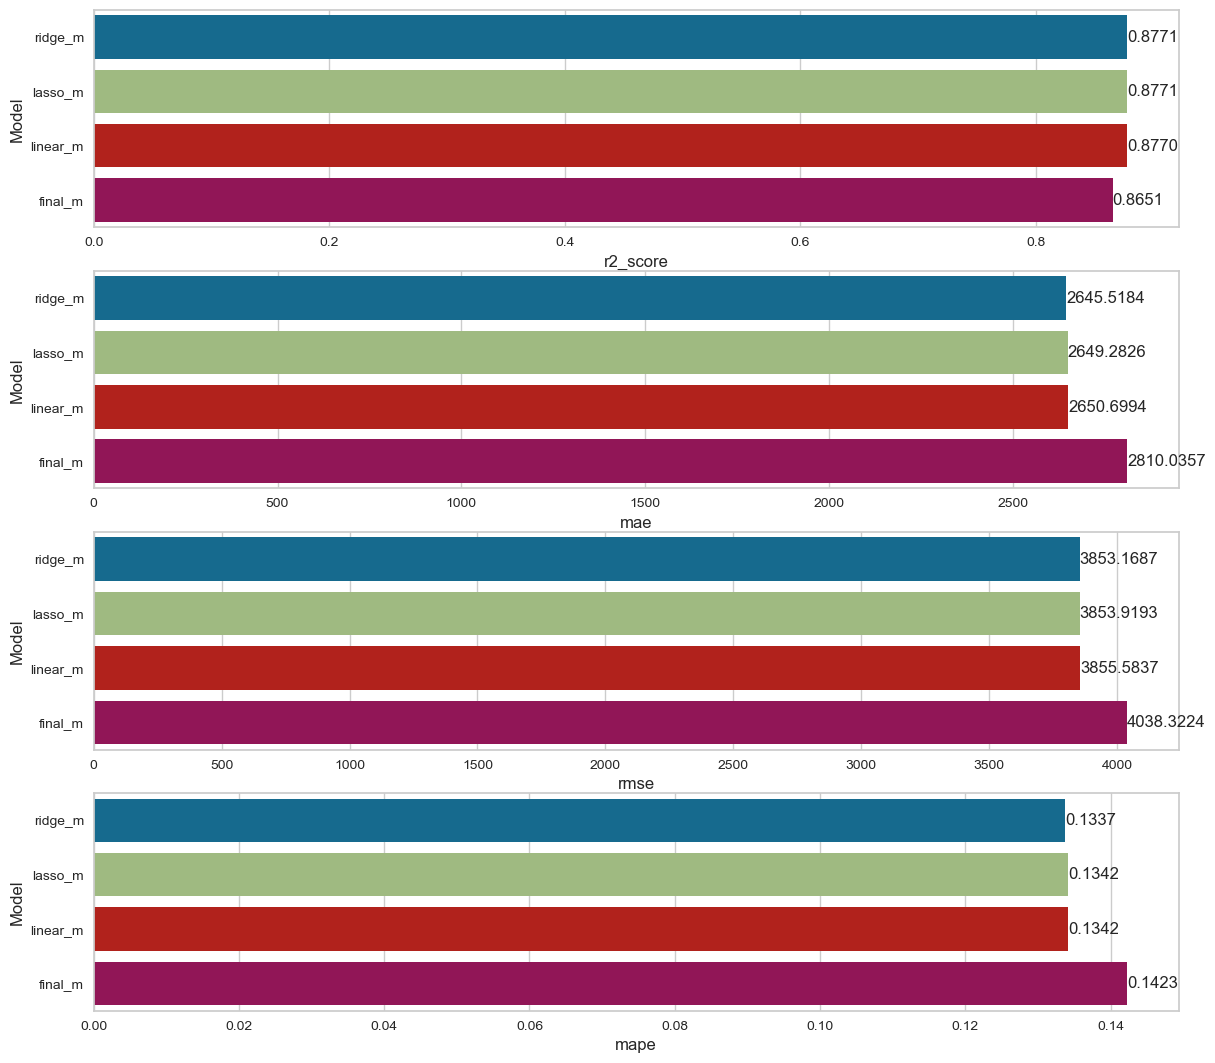

In [184]:
plt.figure(figsize=(14,13))

plt.subplot(411)
compare = compare.sort_values(by="r2_score", ascending=False)
ax=sns.barplot(x="r2_score", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f")

plt.subplot(412)
compare = compare.sort_values(by="mae", ascending=True)
ax=sns.barplot(x="mae", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f")

plt.subplot(413)
compare = compare.sort_values(by="rmse", ascending=True)
ax=sns.barplot(x="rmse", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f")

plt.subplot(414)
compare = compare.sort_values(by="mape", ascending=True)
ax=sns.barplot(x="mape", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.4f")
plt.show()

# Final Model

**After trying all the models, I will split the data into x and y again. But this time there will be no train and test sets.**

In [185]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [186]:
X.head()

,make_model,power_kw,mileage,age,engine_size,type
0,Mercedes-Benz A 180,85.000,27150.000,2.000,1461.000,Used
2,Mercedes-Benz A 180,85.000,21734.000,2.000,1461.000,Used
3,Mercedes-Benz A 180,80.000,172700.000,4.000,1461.000,Used
4,Mercedes-Benz A 180,85.000,18989.000,2.000,1461.000,Used
5,Mercedes-Benz A 180,100.000,25.000,1.000,1332.000,Pre-registered


In [188]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()),
              ("Ridge", Ridge(alpha=1.011090909090909))]
final_model = Pipeline(steps=operations)

**I have decided on the Ridge model and re-build the model with the hyperparameter, where I received the best scores.**

In [189]:
final_model.fit(X, y)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Used',
                                                                              "Employee's "
                                                                              'car',
                                                                              'Demonstration',
                                                                              'Pre-registered']]),
                                                  ['type'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('Ridge', Ridge(alpha=1.011090909090909))])

In [190]:
X

,make_model,power_kw,mileage,age,engine_size,type
0,Mercedes-Benz A 180,85.000,27150.000,2.000,1461.000,Used
2,Mercedes-Benz A 180,85.000,21734.000,2.000,1461.000,Used
3,Mercedes-Benz A 180,80.000,172700.000,4.000,1461.000,Used
4,Mercedes-Benz A 180,85.000,18989.000,2.000,1461.000,Used
5,Mercedes-Benz A 180,100.000,25.000,1.000,1332.000,Pre-registered
...,...,...,...,...,...,...
16261,Volvo S60,228.000,53000.000,3.000,1969.000,Used
16262,Volvo S90,228.000,44873.000,4.000,1969.000,Used
16263,Volvo V40,88.000,114000.000,4.000,1969.000,Used
16265,Volvo S90,288.000,40345.000,3.000,1969.000,Used


In [197]:
X.sample(15)

,make_model,power_kw,mileage,age,engine_size,type
12118,Ford Fiesta,92.000,17745.000,2.000,999.000,Used
7434,SEAT Leon,221.000,55060.000,2.000,1984.000,Used
1084,Opel Insignia,169.000,5990.000,0.000,1998.000,Demonstration
10752,Toyota Yaris,68.000,5.000,0.000,1490.000,Pre-registered
7417,SEAT Leon,221.000,69998.000,3.000,1984.000,Used
7923,Skoda Scala,85.000,20900.000,2.000,1600.000,Used
5949,Fiat 500X,81.000,50306.000,4.000,1600.000,Used
4864,Peugeot 208,100.000,150.000,0.000,1199.000,Used
10481,Toyota C-HR,72.000,40000.000,3.000,1798.000,Used
7273,SEAT Leon,221.000,35700.000,4.000,1984.000,Used


## Prediction of a new observation

In [198]:
my_dict1 = {
    "make_model": 'SEAT Leon',
    "power_kw": 221,
    "mileage": 45000,
    "age": 3,
    "engine_size": 1984,
    "type": "Used"
}

In [199]:
new_observ = pd.DataFrame([my_dict1])
new_observ

,make_model,power_kw,mileage,age,engine_size,type
0,SEAT Leon,221,45000,3,1984,Used


In [200]:
final_model.predict(new_observ)

array([32735.89008238])

In [202]:
X.loc[[7434, 7417, 7273]]

,make_model,power_kw,mileage,age,engine_size,type
7434,SEAT Leon,221.000,55060.000,2.000,1984.000,Used
7417,SEAT Leon,221.000,69998.000,3.000,1984.000,Used
7273,SEAT Leon,221.000,35700.000,4.000,1984.000,Used


In [203]:
y.loc[[7434, 7417, 7273]]

7434   32790.000
7417   36900.000
7273   29800.000
Name: price, dtype: float64

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___